## 2.1 -  Implement K-means clustering from scratch

### 2.1.1

In [11]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img = np.float32(img)


# 1. Randomly select K centers

# 2. Assign each point to the nearest cluster

# Compute new center (mean) for each cluster

def k_means(img, k, iter_n):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    -----
    return: None.
    """
    height, width, ch = img.shape
    
    # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    centers = np.random.random_sample((k, ch))*255
    
    cluster_iter = []
    for i in range(iter_n):
        # 2. Assign each point to the nearest cluster
        # Arr shape = (K, height, width), where K is cluster group
        clusters = calc_distance(img, centers)
        cluster_iter.append(clusters)
        
        # 3. Compute new mean for each cluster 
        new_centers = np.empty(shape=(k, ch))
        for j in range(k):
            np.mean(img[clusters[0]==j], axis=0, out=new_centers[j])
            
        # If new centers and centers are the same, exit iteration
        if((centers == new_centers).all()):
            break
        else:
            centers = new_centers
            
    return cluster_iter
    
def calc_distance(points, centers):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    dists = []
    # Calculate the distance between each point and each center
    for center in centers:
        dists.append([img - center])
    dists = np.linalg.norm(dists, axis=-1)
    
    # Return closest center of each point
    return np.argmin(dists, axis=0)
   
def show_plot(imgs, cols=3, isGray = False):  
    for i in range(len(imgs)):
        plt.figure(figsize=(20, 4))
        if(i==5):
            plt.title("Final Iteration")
        else:
            plt.title("Iteration number: "+str(i))
        plt.axis('off')
        if(isGray):
            plt.imshow(clusters[i][0].astype(np.uint8), cmap='gray')
        else:
            plt.imshow(clusters[i][0].astype(np.uint8))
        plt.show()    

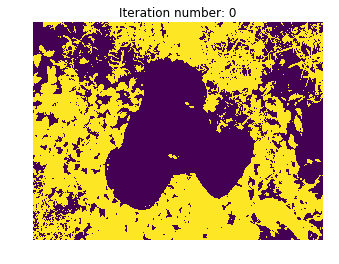

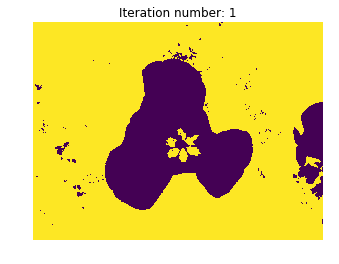

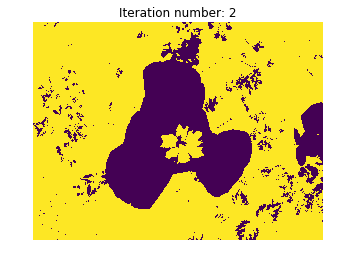

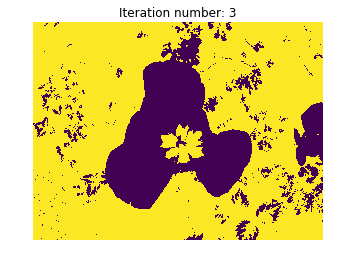

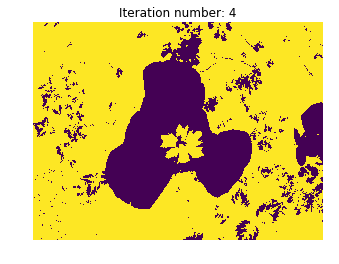

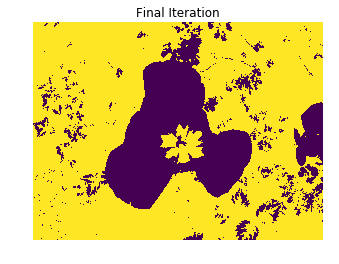

In [12]:
clusters = k_means(img, 2, 6)
show_plot(clusters)

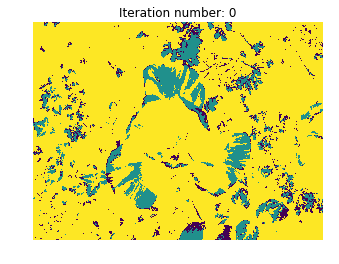

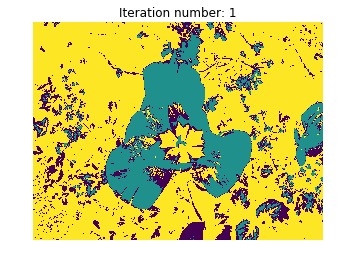

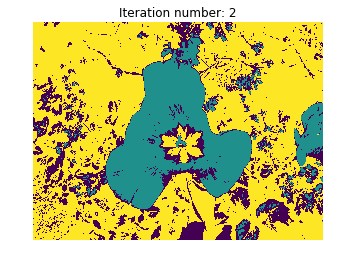

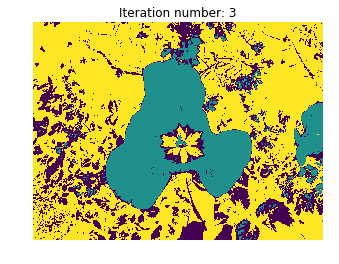

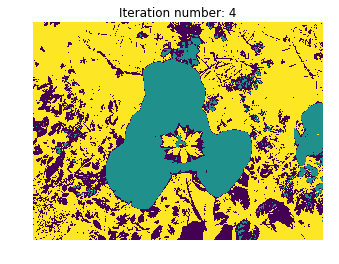

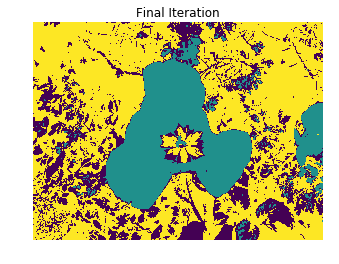

In [13]:
clusters = k_means(img, 3, 6)
show_plot(clusters)

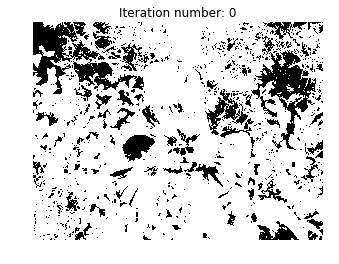

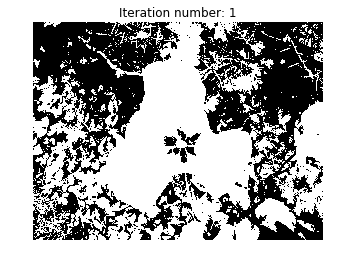

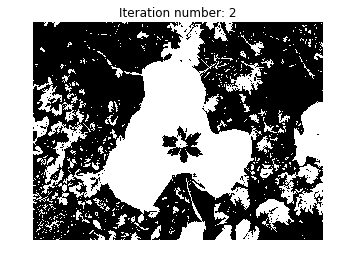

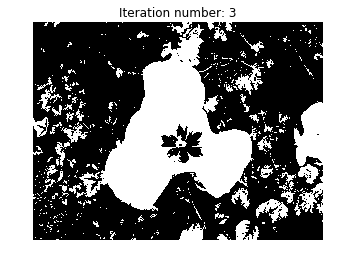

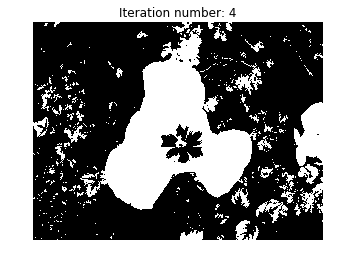

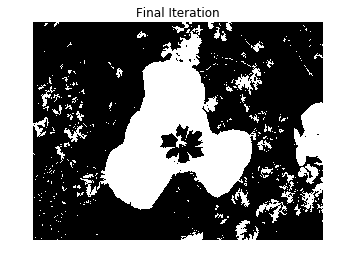

In [14]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img_gray = np.float32(img)
clusters = k_means(img_gray, 2, 6)
show_plot(clusters, isGray = True)

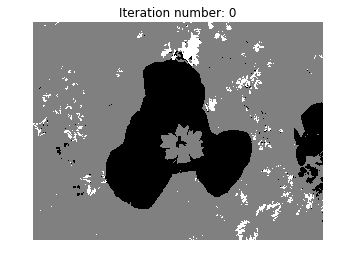

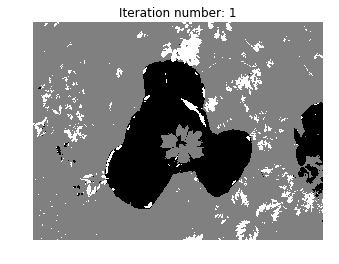

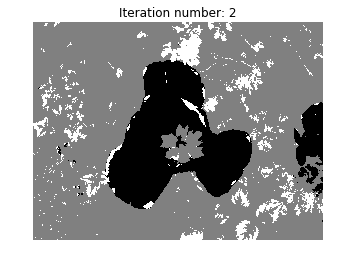

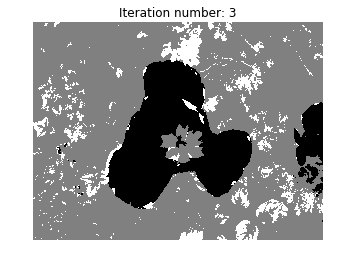

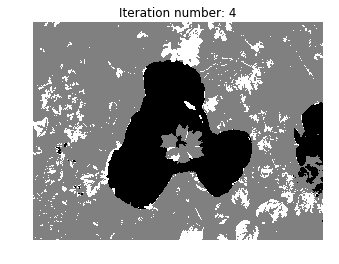

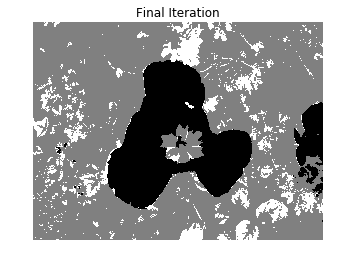

In [15]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img_gray = np.float32(img)
clusters = k_means(img_gray, 3, 6)
show_plot(clusters, isGray = True)

In [16]:
# TODO : compare Color vs Gray scale


## 2.1 -  Implement EM-means clustering from scratch

In [221]:
import math

# prob(Pt | cluster i )
# Probability Density Function (PDF)
def prob_cluster(pixel, cent, std):
    """
    Calculate the probability of association between a point and a
    given Gaussian Distribution for each channel in a pixel.
    -----
    args pixel: the pixel. 
    args cent: the center of the Gaussian distribution. 
    args std: standard deviation OF Gaussian distribution. 
    -----
    returns: PDF of each gaussian K for one pixel. 
    """
    gauss_pdf = []
    for i in range(len(std)):
        point_pdf = []
        for j in range(len(pixel)):
            temp = 1/((math.sqrt(2*math.pi))*std[i][j]) * math.e**(-.5*math.pow((pixel[j]-cent[i][j])/std[i][j],2))
            point_pdf.append(temp)
        gauss_pdf.append(np.linalg.norm(point_pdf, axis=-1))  
    return gauss_pdf

def em(img, k, iterations=10):
    """
    Performs Expectation Maximization (EM) algorithm of an image 
    -----
    args img: the input image
    args k: the number of Gaussian Distributions
    args iterations: the number of iterations 
    -----
    """
    h, w, ch = img.shape
    
    if(k==1):
        raise Exception('K cannot be 1')
    
    # Randomly define a center for each K Gaussian components
    # This center will be the randomly initialized peak for the initial gaussian
    gaus_peak = np.random.random((k, ch)) * 255
    
    # Probability that a point is in a given gaussian K
    prob = np.full(k, (1/k))
    # STD of a point being in a given gaussian K
    std_gaus = np.full((k, ch), (255/k))
    
    print("Probability Gaussian", prob_gaus)
    print("STD Gaussian", std_gaus)

    iter_pdf = []
    for iter in range(iterations):
        # E-Step
        # Assign each point a probability of being in each K Gaussian
        pdf = np.empty(shape=(h, w, k))
        for row in range(h):
            for col in range(w):
                pdf[row][col] = prob_cluster(img[row][col], gaus_peak, std_gaus)
    
        # Normalize the distribution
        pixel_sum = np.sum(pdf * prob, axis=-1)
        pixel_sum = pixel_sum.reshape((h, w, 1))
        pdf = pdf / pixel_sum
    
        # Assign each pixel to a gaussian distribution
        cluster_groups = np.argmax(pdf, axis=-1)
        iter_pdf.append(cluster_groups)
        
    
        # M-Step
        # Tweak pdf to include new data
    
    return pdf
            
# Recalculate the Gaussian based on points

In [222]:
x = em(img, 2)

Probability Gaussian [0.5 0.5]
STD Gaussian [[127.5 127.5 127.5]
 [127.5 127.5 127.5]]


array([[[0.96704119, 1.03295881],
        [0.96751816, 1.03248184],
        [0.96771885, 1.03228115],
        ...,
        [0.97400109, 1.02599891],
        [0.97400109, 1.02599891],
        [0.97871114, 1.02128886]],

       [[0.96704119, 1.03295881],
        [0.96777072, 1.03222928],
        [0.96834575, 1.03165425],
        ...,
        [0.97761255, 1.02238745],
        [0.97448239, 1.02551761],
        [0.97598066, 1.02401934]],

       [[0.96660166, 1.03339834],
        [0.96704119, 1.03295881],
        [0.96771885, 1.03228115],
        ...,
        [0.98649492, 1.01350508],
        [0.97785693, 1.02214307],
        [0.97377887, 1.02622113]],

       ...,

       [[0.99507888, 1.00492112],
        [0.99821801, 1.00178199],
        [1.00519097, 0.99480903],
        ...,
        [1.0116285 , 0.9883715 ],
        [1.01139545, 0.98860455],
        [1.01085821, 0.98914179]],

       [[0.99668119, 1.00331881],
        [0.99817983, 1.00182017],
        [1.00598611, 0.99401389],
        .

In [ ]:
k = 2
ch = 3

# Gaus peaks (centers)
gaus_peak = np.random.random((k, ch)) * 255
# Probability that a point is in a given gaussian K
prob_gaus = np.full(k, (1/k))
# STD of a point being in a given gaussian K
std_gaus = np.full((k, ch), (255/k))

print("Probability Peaks", gaus_peak)
print("Probability Gaussian", prob_gaus)
print("STD Gaussian", std_gaus)

In [194]:
k = 2

gaus_peaks = [[208.26710226, 235.0362611,  210.2826962],
              [62.51236031,  67.88919874, 207.86393764]]
PDF = [0.5, 0.5]
#STD = [[127.5, 127.5, 127.5],
        #[127.5, 127.5, 127.5]]
STD = [[100, 2, 3],
        [400, 5, 6]]
pixel = [32.3, 44.3, 59.2]

prob_cluster(pixel, gaus_peaks, STD)


pixel 32.3
STD 100
Center 208.26710226
pixel 44.3
STD 2
Center 235.0362611
pixel 59.2
STD 3
Center 210.2826962
pixel 32.3
STD 400
Center 62.51236031
pixel 44.3
STD 5
Center 67.88919874
pixel 59.2
STD 6
Center 207.86393764


[0.00084825456463054, 0.0009945155286917964]

In [212]:
exp = [
        [[0.5, 0.6443], [0.3323, 0.322]], # 1st row
        [[0.63, 0.61], [0.22, 0.112]], # 2nd row
    ]
PDF = np.array([10, 1])

k = 2
h = 2
w = 2
tst = np.empty(shape=(h, w, k))

denom = np.sum(exp * PDF, axis=-1)
print(denom)
denom = denom.reshape((h, w, 1))
print(denom)
exp = exp / denom
print(exp)



#denom = denom.reshape((h, w, 1))
#exp = exp / denom

[[5.6443 3.645 ]
 [6.91   2.312 ]]
[[[5.6443]
  [3.645 ]]

 [[6.91  ]
  [2.312 ]]]
[[[0.08858494 0.11415056]
  [0.09116598 0.08834019]]

 [[0.09117221 0.08827786]
  [0.09515571 0.04844291]]]


In [199]:
gauss_pdf = []
    for j in range(len(pixel)):
        point_pdf = []
        for i in range(len(std)):
            print('pixel', pixel[j])
            print('STD',std[i][j])
            print('Center',cent[i][j])
            temp = 1/((math.sqrt(2*math.pi))*std[i][j]) * math.e**(-.5*math.pow((pixel[j]-cent[i][j])/std[i][j],2))
            point_pdf.append(temp)
    return point_pdf

IndentationError: unexpected indent (<ipython-input-199-15a2833f5710>, line 2)